In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm


In [82]:
df_r=pd.read_csv('covid_19_clean_complete.csv')
df_r=df_r.loc[df_r['Country'] == 'India']
df_r=df_r[['Date','Recovered']]
print(df_r[100:])

             Date  Recovered
26631  05-01-2020      10007
26896  05-02-2020      10819
27161  05-03-2020      11775
27426  05-04-2020      12847
27691  05-05-2020      14142
27956  05-06-2020      15331
28221  05-07-2020      16776
28486  05-08-2020      17887
28751  05-09-2020      19301
29016  05-10-2020      20969
29281  05-11-2020      22549
29546  05-12-2020      24420
29811     5/13/20      26400
30076     5/14/20      27969
30341     5/15/20      30258
30606     5/16/20      34224
30871     5/17/20      36795
31136     5/18/20      39233
31401     5/19/20      42309
31666     5/20/20      45422
31931     5/21/20      48553
32196     5/22/20      51824
32461     5/23/20      54385
32726     5/24/20      57692
32991     5/25/20      60706


In [83]:
df=pd.read_csv('covid_19_clean_complete.csv')
df=df.loc[df['Country'] == 'India']
df=df[['Date','Confirmed']]
print(df[100:])

             Date  Confirmed
26631  05-01-2020      37257
26896  05-02-2020      39699
27161  05-03-2020      42505
27426  05-04-2020      46437
27691  05-05-2020      49400
27956  05-06-2020      52987
28221  05-07-2020      56351
28486  05-08-2020      59695
28751  05-09-2020      62808
29016  05-10-2020      67161
29281  05-11-2020      70768
29546  05-12-2020      74292
29811     5/13/20      78055
30076     5/14/20      81997
30341     5/15/20      85784
30606     5/16/20      90648
30871     5/17/20      95698
31136     5/18/20     100328
31401     5/19/20     106475
31666     5/20/20     112028
31931     5/21/20     118226
32196     5/22/20     124794
32461     5/23/20     131423
32726     5/24/20     138536
32991     5/25/20     144950


In [84]:
df_d=pd.read_csv('covid_19_clean_complete.csv')
df_d=df_d.loc[df_d['Country'] == 'India']
df_d=df_d[['Date','Deaths']]
print(df_d[100:])

             Date  Deaths
26631  05-01-2020    1223
26896  05-02-2020    1323
27161  05-03-2020    1391
27426  05-04-2020    1566
27691  05-05-2020    1693
27956  05-06-2020    1785
28221  05-07-2020    1889
28486  05-08-2020    1985
28751  05-09-2020    2101
29016  05-10-2020    2212
29281  05-11-2020    2294
29546  05-12-2020    2415
29811     5/13/20    2551
30076     5/14/20    2649
30341     5/15/20    2753
30606     5/16/20    2871
30871     5/17/20    3025
31136     5/18/20    3156
31401     5/19/20    3302
31666     5/20/20    3434
31931     5/21/20    3584
32196     5/22/20    3726
32461     5/23/20    3868
32726     5/24/20    4024
32991     5/25/20    4172


In [85]:
deaths=np.asarray(df_d['Deaths'])
recovered=np.asarray(df_r['Recovered'])
confirmed=np.asarray(df['Confirmed'])

In [86]:
##death rate
# death_rate=np.divide(deaths,total)
# death_rate=death_rate[~np.isnan(death_rate)]
# print(np.mean(death_rate))

In [87]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.arima_model import ARIMA
mod1 =ARIMA(deaths,order=(2,2,0))
results_death=mod1.fit()
forecast,x,z=results_death.forecast(steps=67,alpha=0.05)
forecast=np.array(forecast).round(2)
print(forecast)
##forecasted deaths

[ 4323.    4477.14  4630.68  4786.01  4942.81  5100.5   5259.56  5419.87
  5581.35  5744.09  5908.06  6073.25  6239.67  6407.33  6576.21  6746.32
  6917.67  7090.24  7264.04  7439.07  7615.34  7792.83  7971.55  8151.5
  8332.68  8515.09  8698.73  8883.6   9069.7   9257.03  9445.59  9635.38
  9826.4  10018.65 10212.12 10406.83 10602.77 10799.94 10998.33 11197.96
 11398.81 11600.9  11804.22 12008.76 12214.54 12421.54 12629.77 12839.24
 13049.93 13261.86 13475.01 13689.39 13905.   14121.85 14339.92 14559.22
 14779.75 15001.51 15224.5  15448.72 15674.17 15900.85 16128.76 16357.9
 16588.27 16819.87 17052.7 ]


Text(0.5, 1.0, 'Recovered cases of Covid-19- Autocorrelation')

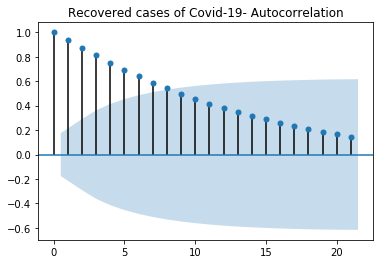

In [88]:
#autocorrelation of recovered
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(recovered)
plt.title('Recovered cases of Covid-19- Autocorrelation')

Text(0.5, 1.0, 'Recovered cases Covid-19- Parital Autocorrelation')

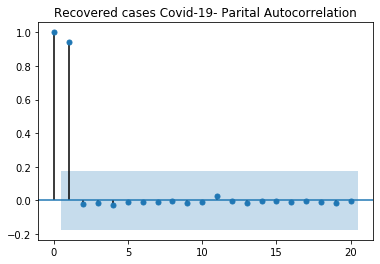

In [89]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(recovered,lags=20)
plt.title('Recovered cases Covid-19- Parital Autocorrelation')
#hence p value is 2 and q is 0

In [90]:
###RELEVANT for recovered
from statsmodels.tsa.arima_model import ARIMA
p=range(0,3)
d=range(0,3)
q=[0]
pdq = list(itertools.product(p, d, q))
for param in pdq:
    try:
        mod =ARIMA(recovered,order=param)
        results_recovered= mod.fit()
        print('ARIMA{}- AIC:{},BIC:{}'.format(param,results_recovered.aic,results_recovered.bic))
    except:
        continue


ARIMA(0, 0, 0)- AIC:2740.9715212851,BIC:2746.628148759705
ARIMA(0, 1, 0)- AIC:2044.2365594943647,BIC:2049.877122625575
ARIMA(0, 2, 0)- AIC:1717.2457623061828,BIC:1722.8701310169276
ARIMA(1, 0, 0)- AIC:2101.9513788401655,BIC:2110.4363200520725
ARIMA(1, 1, 0)- AIC:1736.3313344028024,BIC:1744.7921790996174
ARIMA(1, 2, 0)- AIC:1703.694246837099,BIC:1712.1307999032163
ARIMA(2, 1, 0)- AIC:1724.9861935651832,BIC:1736.2673198276034
ARIMA(2, 2, 0)- AIC:1677.4010698217335,BIC:1688.6498072432232


In [91]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.arima_model import ARIMA
mod2 =ARIMA(recovered,order=(2,2,0))
results_recovered=mod2.fit()
forecast2,x,z=results_recovered.forecast(steps=67,alpha=0.05)
#print(forecast2)
forecast2=np.array(forecast2).round(2)
print(forecast2)
##forecasted recoveed

[ 63566.53  66687.21  69798.46  72841.57  75970.85  79137.18  82293.2
  85485.16  88712.17  91953.19  95219.04  98514.15 101831.29 105171.99
 108538.85 111929.86 115344.82 118784.76 122249.26 125738.06 129251.47
 132789.46 136351.9  139938.88 143550.4  147186.43 150846.98 154532.06
 158241.66 161975.78 165734.42 169517.59 173325.28 177157.49 181014.22
 184895.48 188801.25 192731.56 196686.38 200665.73 204669.59 208697.99
 212750.9  216828.33 220930.29 225056.77 229207.78 233383.3  237583.35
 241807.92 246057.02 250330.63 254628.77 258951.43 263298.61 267670.32
 272066.55 276487.3  280932.57 285402.37 289896.69 294415.53 298958.89
 303526.77 308119.18 312736.11 317377.57]


In [96]:
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.arima_model import ARIMA
forecast1,x2,z2=results.forecast(steps=67,alpha=0.05)
forecast1=np.array(forecast1).round(2)
print(forecast1)

[151804.3  158515.27 165381.89 172251.   179201.06 186191.88 193244.04
 200347.   207506.16 214718.75 221986.2  229307.78 236683.85 244114.22
 251599.01 259138.14 266731.66 274379.54 282081.8  289838.43 297649.43
 305514.8  313434.55 321408.66 329437.15 337520.01 345657.23 353848.84
 362094.81 370395.15 378749.87 387158.95 395622.41 404140.24 412712.45
 421339.02 430019.96 438755.28 447544.97 456389.03 465287.46 474240.26
 483247.43 492308.98 501424.9  510595.18 519819.84 529098.88 538432.28
 547820.05 557262.2  566758.72 576309.61 585914.87 595574.5  605288.5
 615056.88 624879.63 634756.74 644688.23 654674.1  664714.33 674808.93
 684957.91 695161.26 705418.98 715731.07]


In [79]:
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.arima_model import ARIMA
forecast1,x2,z2=results.forecast(steps=67,alpha=0.05)
print(forecast1)

NameError: name 'results' is not defined

In [41]:
print(forecast.shape)
print(forecast2.shape)
total=np.add(forecast,forecast2)


(67,)
(67,)


In [54]:
death_rate1=(np.divide(forecast[21:],total[21:]))*100
print(np.mean(death_rate1))

5.269218527677815


In [55]:
# recovery_rate=(np.divide(forecast2[21:],total[21:]))*100
# print(np.mean(recovery_rate))

94.73078147232219


In [102]:
#recovered
x=(forecast2[-1])-(forcast2[21])

In [103]:
#total confirmed
y=(forecast1[-1])-(forecast1[21])

In [104]:
recovery_rate=(np.mean(x/y))*100
print(recovery_rate)

44.99775447716885
